In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tqdm import tqdm

In [5]:
class Autoencoder:
    def __init__(self, x_train, x_test, epochs=300, learning_rate=0.1, batch_size=196):         
        self.x_train = x_train
        self.x_test = x_test
        self.input_dim = x_train.shape[1] 
        self.hidden_dim = 128 
        self.output_dim = self.input_dim
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.b1 = np.zeros(self.hidden_dim)         
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)
        self.b2 = np.zeros(self.output_dim)
        
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def run(self):
        for epoch in tqdm(range(self.epochs)):
            np.random.shuffle(self.x_train)
            for i in range(0, len(self.x_train), self.batch_size):
                x_batch = self.x_train[i:i+self.batch_size]

                z1 = np.dot(x_batch, self.W1) + self.b1
                a1 = self.sigmoid(z1)

                z2 = np.dot(a1, self.W2) + self.b2
                a2 = self.sigmoid(z2)

                error = a2 - x_batch

                delta2 = error * self.sigmoid_derivative(z2)
                dW2 = np.dot(a1.T, delta2)
                db2 = np.sum(delta2, axis=0)

                delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(z1)
                dW1 = np.dot(x_batch.T, delta1)
                db1 = np.sum(delta1, axis=0)

                self.W1 -= self.learning_rate * dW1 / self.batch_size
                self.b1 -= self.learning_rate * db1 / self.batch_size
                self.W2 -= self.learning_rate * dW2 / self.batch_size
                self.b2 -= self.learning_rate * db2 / self.batch_size
                
    def visualization(self):        
        z1_test = np.dot(self.x_test, self.W1) + self.b1
        a1_test = self.sigmoid(z1_test)
        z2_test = np.dot(a1_test, self.W2) + self.b2
        a2_test = self.sigmoid(z2_test)
        
        plt.figure(figsize=(20, 4))
        for num, index in enumerate([0,1,2,3,4,7,8,11,18,61]):
            ax = plt.subplot(2, 10, num + 1)
            plt.imshow(x_test[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            ax = plt.subplot(2, 10, num + 1 + 10)
            plt.imshow(a2_test[index].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# нормализуем наши значения пикселей
x_train = x_train / 255
x_test = x_test / 255
# превратим нашу матрицу пикселей в вектор
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
acd = Autoencoder(x_train, x_test)
acd.run()

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [21:45<00:00,  4.35s/it]


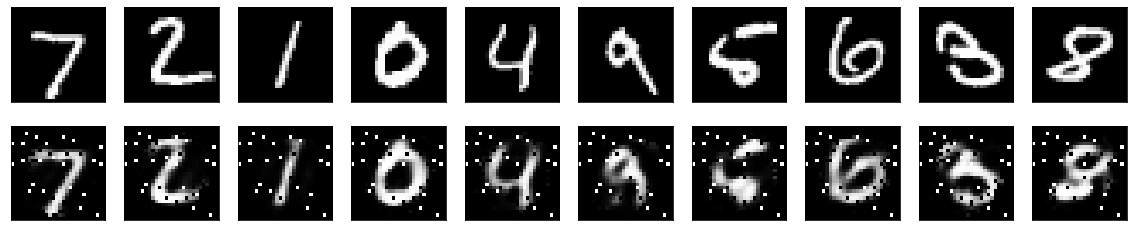

In [7]:
acd.visualization()